<a href="https://colab.research.google.com/github/wiroel/my-repo/blob/main/project_feat_slct_split__mod_slct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
import gdown

file_id = '1s_GnDCbsQbrDNOmBYeV7m1lOGWxzUUy_'

file_name = 'final_dataset.csv'

gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)

df = pd.read_csv(file_name)

df

Downloading...
From: https://drive.google.com/uc?id=1s_GnDCbsQbrDNOmBYeV7m1lOGWxzUUy_
To: /content/final_dataset.csv
100%|██████████| 1.05M/1.05M [00:00<00:00, 24.8MB/s]


,Year,Track,Track_encoded,Country,Country_encoded,Position,Driver,Driver_encoded,Team,Team_encoded,Starting Grid,Points,Pitstop Time,Weather,avg_confidence_score,Winner,Regulation_era
0,2001,Albert Park Grand Prix Circuit,0,Australia,0,1,Michael Schumacher,70,Ferrari,7,1.0,2.397895,28.7170,1,0.783739,1,1
1,2001,Albert Park Grand Prix Circuit,0,Australia,0,2,David Coulthard,20,McLaren,17,6.0,1.945910,28.5160,1,0.551130,0,1
2,2001,Albert Park Grand Prix Circuit,0,Australia,0,3,Rubens Barrichello,100,Ferrari,7,2.0,1.609438,28.6580,1,0.783739,0,1
3,2001,Albert Park Grand Prix Circuit,0,Australia,0,4,Nick Heidfeld,77,Sauber,22,10.0,1.386294,28.2470,1,0.255000,0,1
4,2001,Albert Park Grand Prix Circuit,0,Australia,0,5,Heinz-Harald Frentzen,37,Jordan,12,4.0,1.098612,28.1420,1,0.174400,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,2023,Yas Marina Circuit,37,UAE,26,16,Logan Sargeant,60,Williams,29,20.0,0.000000,42.3810,0,0.320217,0,4
9303,2023,Yas Marina Circuit,37,UAE,26,17,Guanyu Zhou,35,Sauber,22,19.0,0.000000,37.8030,0,0.255000,0,4
9304,2023,Yas Marina Circuit,37,UAE,26,18,Carlos Sainz,12,Ferrari,7,16.0,0.000000,40.0685,0,0.783739,0,4
9305,2023,Yas Marina Circuit,37,UAE,26,19,Valtteri Bottas,114,Sauber,22,18.0,0.000000,37.8030,0,0.255000,0,4


## Feature Selection

In [24]:
numeric_columns = ['Country_encoded', 'Track_encoded', 'Starting Grid', 'Points',
                   'Pitstop Time', 'avg_confidence_score', 'Weather',
                   'Team_encoded', 'Driver_encoded', 'Position', 'Year', 'Winner', 'Regulation_era']

# correlation analysis


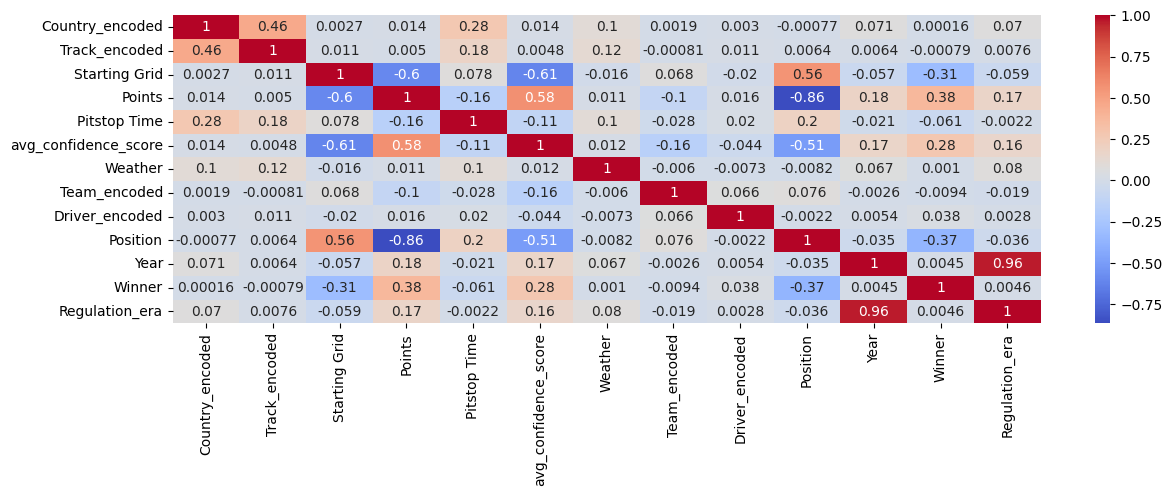

In [25]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(14,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# regression feature elimination

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [27]:
numeric_columns = ['Country_encoded', 'Track_encoded', 'Starting Grid', 'Points',
                   'Pitstop Time', 'avg_confidence_score', 'Weather',
                   'Team_encoded', 'Driver_encoded', 'Position', 'Year', 'Regulation_era']

numeric_df = df[numeric_columns]

X = numeric_df
y = df['Winner']

In [28]:
lr = LogisticRegression(max_iter=1000)

rfe = RFE(lr, n_features_to_select=5)

rfe.fit(X, y)

selected_features = pd.DataFrame({'Feature': X.columns, 'Selected': rfe.support_, 'Ranking': rfe.ranking_})

print(selected_features[selected_features['Selected']==True])

                 Feature  Selected  Ranking
2          Starting Grid      True        1
3                 Points      True        1
5   avg_confidence_score      True        1
9               Position      True        1
11        Regulation_era      True        1


# random forest classifier


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

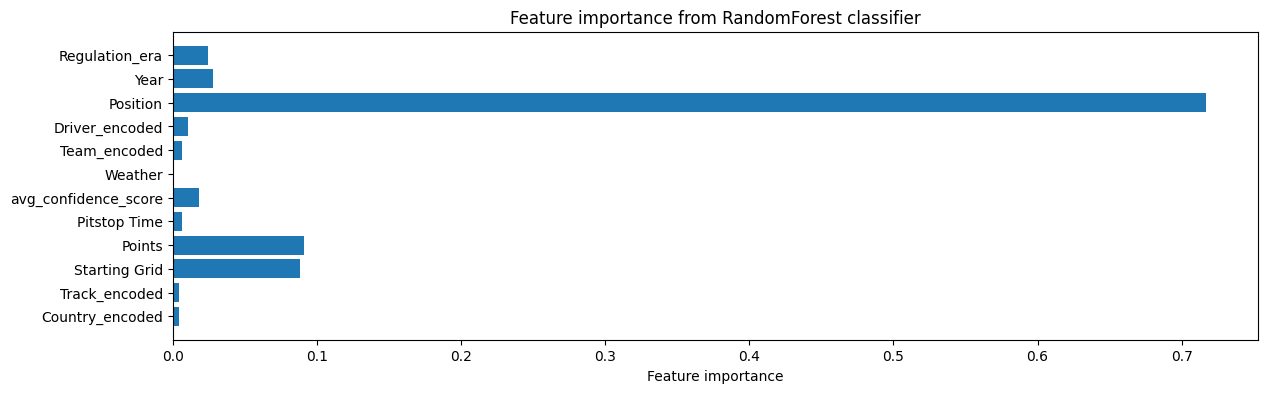

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X, y)

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(14,4))
plt.barh(features, importance)
plt.xlabel('Feature importance')
plt.title('Feature importance from RandomForest classifier')
plt.show()

# chi-square

In [30]:
import scipy.stats as stats

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
skb = SelectKBest(chi2, k='all')
skb.fit(X, y)

scores = pd.DataFrame({'Feature': X.columns, 'Score':skb.scores_})
print(scores.sort_values(by='Score', ascending=False))

                 Feature        Score
9               Position  4254.820535
2          Starting Grid  3186.635322
3                 Points  1768.534551
8         Driver_encoded   244.480214
5   avg_confidence_score   112.151122
4           Pitstop Time    95.680458
7           Team_encoded     4.857519
11        Regulation_era     0.098287
1          Track_encoded     0.041663
6                Weather     0.005402
10                  Year     0.003962
0        Country_encoded     0.001342


# Splitting Data

In [32]:
train_df = df[df['Year']<=2020]
test_df = df[df['Year']>2020]

In [33]:
features = ['Starting Grid', 'Points', 'avg_confidence_score', 'Regulation_era', 'Weather']

X_train = train_df[features]
y_train = train_df['Winner']


X_test = test_df[features]
y_test = test_df['Winner']




#SMOTE for imbalance of data
Synthetic Minority Over-sampling Technique
# not applied to test value

In [34]:
from imblearn.over_sampling import SMOTE

smote= SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Berfore smote: ', y_train.value_counts())
print('after smote: ', y_train_resampled.value_counts())

print(X_train_resampled.shape)

Berfore smote:  Winner
0    7611
1     376
Name: count, dtype: int64
after smote:  Winner
1    7611
0    7611
Name: count, dtype: int64
(15222, 5)


In [35]:
df['Winner'].value_counts()

,count
Winner,
0,8865
1,442


# Model selection

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split



In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_resampled, y_train_resampled)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('For decision tree')
print('ACCURACY:', accuracy)
print('Precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('cm:', cm)

For decision tree
ACCURACY: 0.9181818181818182
Precision: 0.2857142857142857
recall: 0.42424242424242425
f1: 0.34146341463414637
cm: [[1184   70]
 [  38   28]]


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('for random forest')
print('ACCURACY:', accuracy)
print('Precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('cm:', cm)

for random forest
ACCURACY: 0.9272727272727272
Precision: 0.3684210526315789
recall: 0.6363636363636364
f1: 0.4666666666666667
cm: [[1182   72]
 [  24   42]]


In [42]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train_resampled.to_numpy(), y_train_resampled)

y_pred = xg.predict(X_test.to_numpy())

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('for xg')
print('ACCURACY:', accuracy)
print('Precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('cm:', cm)

for xg
ACCURACY: 0.9272727272727272
Precision: 0.38461538461538464
recall: 0.7575757575757576
f1: 0.5102040816326531
cm: [[1174   80]
 [  16   50]]


In [43]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train_resampled, y_train_resampled)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('for neural networks')
print('ACCURACY:', accuracy)
print('Precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('cm:', cm)

for neural networks
ACCURACY: 0.9583333333333334
Precision: 0.5873015873015873
recall: 0.5606060606060606
f1: 0.5736434108527132
cm: [[1228   26]
 [  29   37]]


## using pickle and joblib to save the process and download?

In [37]:
import joblib

from google.colab import drive

drive.mount('/content/drive')

joblib.dump(X_train_resampled, '/content/drive/MyDrive/X_train_resampled.pkl')
joblib.dump(y_train_resampled, '/content/drive/MyDrive/y_train_resampled.pkl')

joblib.dump(X_test, '/content/drive/MyDrive/X_test.pkl')
joblib.dump(y_test, '/content/drive/MyDrive/y_test.pkl')

joblib.dump(features, '/content/drive/MyDrive/features.pkl')

joblib.dump(train_df, '/content/drive/MyDrive/train_df.pkl')
joblib.dump(test_df, '/content/drive/MyDrive/test_df.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/test_df.pkl']

# Model selection